In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, 'src')
from train import Train
from data_iter import DataIterBuilder
from network import Network
import mxnet as mx
import GPUtil

In [3]:
data_iter = DataIterBuilder()
train_iter, test_iter = data_iter.get_data_iter(mode='mnist')
network = Network()
a = network.network.collect_params()
ctx_list = [mx.gpu(i) for i in range(len(GPUtil.getAvailable()))]
t = Train(ctx_list=ctx_list, train_iter=train_iter, test_iter=test_iter, network=network)
print("EVAL METRICS: {}".format(t.eval_metrics))

t.train(num_epocs=1)

EVAL METRICS: EvalMetric: {'rmse': nan, 'accuracy': nan}

EPOCH:0; TRAIN_DATA: BATCH:99; Metrics:[('rmse', 5.5656765945226763), ('accuracy', 0.84896341463414637)]
EPOCH:0; TEST_DATA: BATCH:99; Metrics:[('rmse', 5.5656765945226763), ('accuracy', 0.84896341463414637)]

EPOCH:0; TRAIN_DATA: BATCH:199; Metrics:[('rmse', 5.7512240252142286), ('accuracy', 0.87753048780487808)]
EPOCH:0; TEST_DATA: BATCH:199; Metrics:[('rmse', 5.7512240252142286), ('accuracy', 0.87753048780487808)]

EPOCH:0; TRAIN_DATA: BATCH:299; Metrics:[('rmse', 5.8699270649178947), ('accuracy', 0.89243902439024392)]
EPOCH:0; TEST_DATA: BATCH:299; Metrics:[('rmse', 5.8699270649178947), ('accuracy', 0.89243902439024392)]

EPOCH:0; TRAIN_DATA: BATCH:399; Metrics:[('rmse', 5.952245017433909), ('accuracy', 0.90314024390243908)]
EPOCH:0; TEST_DATA: BATCH:399; Metrics:[('rmse', 5.952245017433909), ('accuracy', 0.90314024390243908)]

EPOCH:0; TRAIN_DATA: BATCH:499; Metrics:[('rmse', 6.0366208788949693), ('accuracy', 0.911048780487

{'rmse': [6.2776184757432247], 'rmse_val': [6.2776184757432247]}
{'accuracy': [0.93000000000000005], 'accuracy_val': [0.93000000000000005]}
PATH: ['/home/ec2-user/SageMaker/GluonBootcamp/src/fancy_mnist/rmse-plot.png', '/home/ec2-user/SageMaker/GluonBootcamp/src/fancy_mnist/accuracy-plot.png']


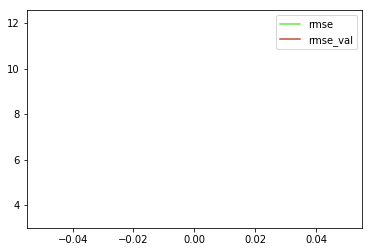

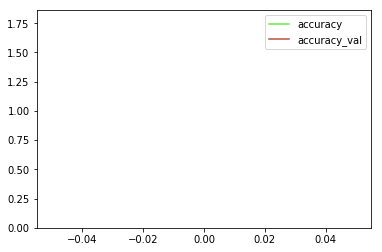

In [5]:
for th in t.training_history_list.trainings_histories:
    print(th.history)
t.training_history_list.plot()


# Challenges:
1. Develop a custom metric of your choosing
2. Add your metrics to your set of metrics
3. run the code on more than one GPU and time the training time
4. Use fashion mnist instead of mnist
5. increase batch size to 1000 and check the results
6. use the appropriate optimization algorithms for large batch size and compare results